# Effects of borrower and loan characteristics on the incidence of defaults.

## by Audrey Dogbeh

## Investigation Overview

This presentation aims at sharing findings regarding the influence of different factors on the incidence of unpaid loans among Prosper listings.

## Dataset Overview

The dataset includes 110,000+ listings of consumer loans provided by Prosper, with information on the borrower and loan details and status, among others. I was only interested in looking at closed loans, so my dataset was reduced to 43,000+ listings, with attributes such as loan amount, borrower income and employment, and debt-to-income ratio.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import importlib

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv("loans_clean.csv")

In [3]:
loans.loc[loans.Paid==True,"Paid"]="Paid"
loans.loc[loans.Paid==False,"Paid"]="Defaulted"
basis_color = sb.color_palette()[0]

In [4]:
# Make Prosper ratings into categorical ordered data
ratings = ["HR","E","D","C","B","A","AA"]
ratings_types=pd.api.types.CategoricalDtype(ordered=True, categories=ratings)
loans.ProsperRating=loans.ProsperRating.astype(ratings_types)

## Distribution of loan status

Roughly 11% of all closed loans were defaulted or charged off. The proportion is similar if we consider dollar amounts. The plot shows counts of loans in the dataset.

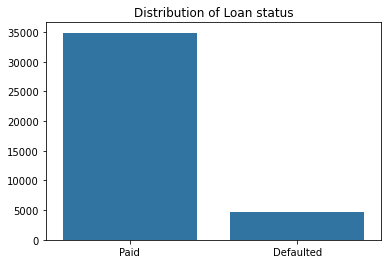

In [5]:
sb.countplot(data=loans, x="Paid", color = basis_color)
plt.title('Distribution of Loan status')
plt.xlabel("")
plt.ylabel("");

## Distribution of debt-to-income ratio

The debt-to-income ratio is a measure of the borrower's overall debt before applying for the loan relative to their yearly income. Most people have between 0 and 50% debt-to-income ratio. The distribution is right-skewed. Here plotted for values between 0 and 1 - each bin represents 5%.

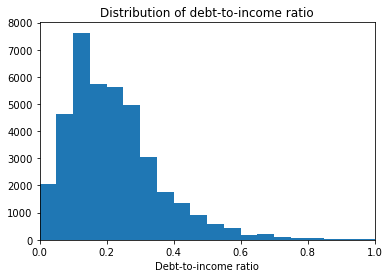

In [6]:
bins = np.arange(0, 1+0.05, 0.05)
plt.hist(loans.DebtToIncomeRatio, bins=bins)
plt.xlim(0,1)
plt.xlabel("Debt-to-income ratio")
plt.title("Distribution of debt-to-income ratio");

## Debt-to-income ratio VS loan status and Prosper rating

We can clearly see defaulted loans are associated to higher debt-to-income ratios, as seen by the higher 3rd quartile and maximum of the debt-to-income ratios of the defaulted loans.
Similarly there is a visible negative relationship between the Prosper rating (from HR (low) to AA (high)) and the debt-to-income ratio. The debt-to-income ratio influences the rating of the loan.

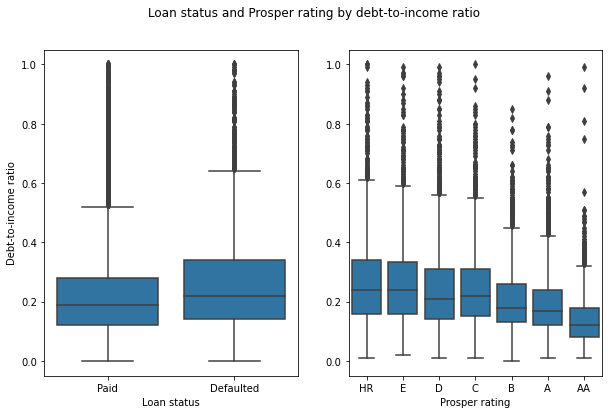

In [7]:
fig, ax = plt.subplots(ncols = 2, figsize = [10,6])
sb.boxplot(loans.Paid, loans.DebtToIncomeRatio, color = basis_color, ax = ax[0])
ax[0].set_xlabel("Loan status")
ax[0].set_ylabel("Debt-to-income ratio")
sb.boxplot(loans.ProsperRating, loans.DebtToIncomeRatio, color = basis_color, ax=ax[1])
ax[1].set_xlabel("Prosper rating")
ax[1].set_ylabel("")
fig.suptitle("Loan status and Prosper rating by debt-to-income ratio");

## Loan status VS Prosper rating

We can observe a clear pattern when looking at the repartition of paid and defualted loans in each rating category. The lower the rating the higher rate of defaults.

In [8]:
# Loan status VS Prosper rating
# let's rearrange dat to feed into seaborn catplot
cat1=loans.groupby(["ProsperRating"])["Paid"].value_counts(normalize=True).mul(100)
cat1=cat1.reset_index(name="percent")
cat1

,ProsperRating,Paid,percent
0,HR,Paid,91.596639
1,HR,Defaulted,8.403361
2,E,Paid,92.771619
3,E,Defaulted,7.228381
4,D,Paid,93.606724
5,D,Defaulted,6.393276
6,C,Paid,95.985790
7,C,Defaulted,4.014210
8,B,Paid,97.067558
9,B,Defaulted,2.932442


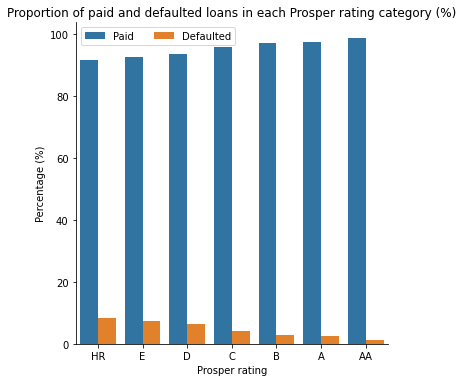

In [9]:
sb.catplot(data=cat1, x="ProsperRating",y="percent", hue="Paid", kind="bar", legend=False)
plt.legend(ncol=2)
plt.title("Proportion of paid and defaulted loans in each Prosper rating category (%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Prosper rating");

## Debt- and loan-to-income ratios combined strength

When we look at the scatter plot of debt-to-income ratio and loan-to-income ratio (for a sample of 200 paid and 200 defaulted loans), there is a visible moderate positive correlation between the two. This suggests that the more debt-to-income a person has prior to applying for a loan, the more money (compared to their income) they are borrowing. This could be explained by the fact that people borrow to consolidate their debt.

We can clearly observe that points in the upper right part of the figure are majoritarily from the unpaid sample. Besides the numerical variables are visibly positively correlated, so people with higher debts in relation to their income are also more likely to borrow a high amount in relation to their income. And also more likely to no repay the loan in full.

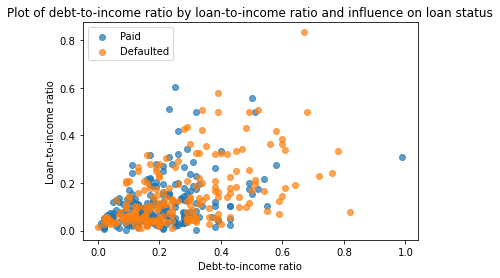

In [10]:
loans_paid = loans[loans['Paid'] == "Paid"].sample(200)
loans_unpaid = loans[loans['Paid'] == "Defaulted"].sample(200)
plt.scatter(data = loans_paid, x = 'DebtToIncomeRatio', y = 'LoanToIncome',alpha=0.7)
plt.scatter(data = loans_unpaid, x = 'DebtToIncomeRatio', y = 'LoanToIncome', alpha=0.7)
plt.legend(['Paid','Defaulted'], loc="upper left")
plt.xlabel("Debt-to-income ratio")
plt.ylabel("Loan-to-income ratio")
plt.title("Plot of debt-to-income ratio by loan-to-income ratio and influence on loan status");

## Influence of debt-to-income ratio across all loan ratings

We can see on the plots that a higher rating is associated with decreasing debt-to-income ratios, but that in every single loan rating category, the debt-to-income ratio is positively related to the incidence of default of loan.

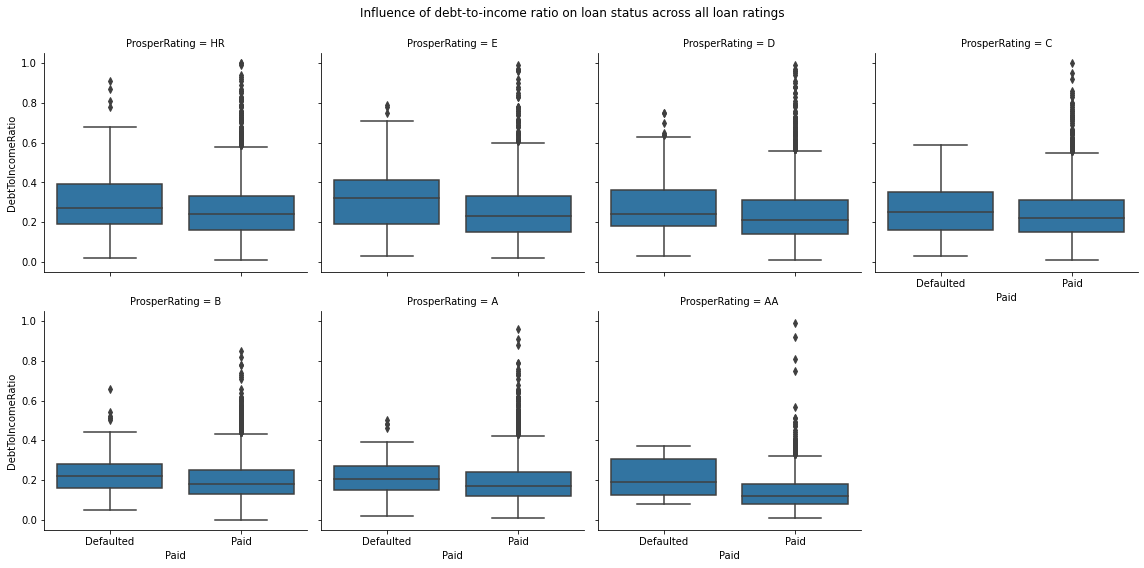

In [14]:
g = sb.FacetGrid(data = loans, col = 'ProsperRating', height = 4, col_wrap=4)
g.map(sb.boxplot, 'Paid', 'DebtToIncomeRatio',order=["Defaulted","Paid"])
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Influence of debt-to-income ratio on loan status across all loan ratings");

# Key insights

- The debt-to-income ratio was an important factor influencing whether a loan was repaid in full or not. High ratios meant higher incidence of unpaid loans.
- This aspect was increase as the loan-to-income ratio increased as well.
- The Prosper rating is correctly giving an idea of the loan risk (for an investor for example). However, the debt-to-income ratio is an important factor to look at even when choosing loans with the highest Prosper ratings.